In [1]:
import pyforest
import plotly.express as px

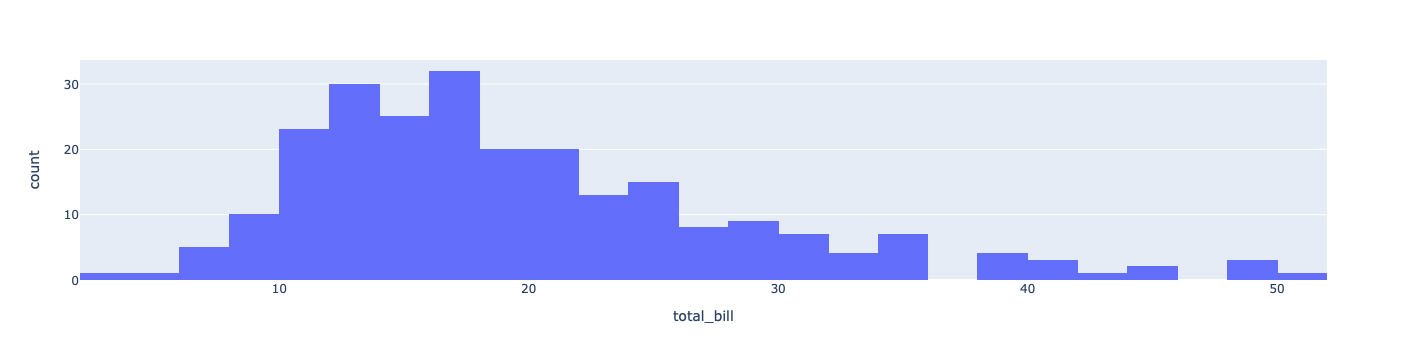

In [2]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

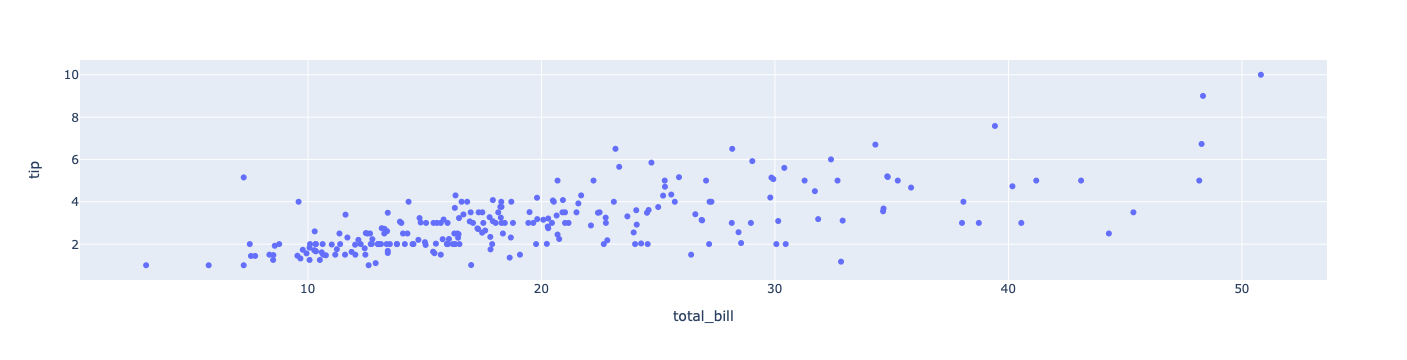

In [29]:
fig = px.scatter(df, x="total_bill", y="tip")
fig.show()

In [3]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [4]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [5]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# Cleaning and Converting

In [6]:
del df["size"]

In [7]:
del df["day"]

In [8]:
df

total_bill   tip     sex smoker    time
0         16.99  1.01  Female     No  Dinner
1         10.34  1.66    Male     No  Dinner
2         21.01  3.50    Male     No  Dinner
3         23.68  3.31    Male     No  Dinner
4         24.59  3.61  Female     No  Dinner
..          ...   ...     ...    ...     ...
239       29.03  5.92    Male     No  Dinner
240       27.18  2.00  Female    Yes  Dinner
241       22.67  2.00    Male    Yes  Dinner
242       17.82  1.75    Male     No  Dinner
243       18.78  3.00  Female     No  Dinner

[244 rows x 5 columns]

In [9]:
cleanup_categories = {"sex":     {"Female": 0, "Male": 1},
                     "smoker":{"No":0, "Yes":1},
                     "time":{"Dinner":2, "Lunch":1, "Breakfast":0}}

In [10]:
df = df.replace(cleanup_categories)
df

total_bill   tip  sex  smoker  time
0         16.99  1.01    0       0     2
1         10.34  1.66    1       0     2
2         21.01  3.50    1       0     2
3         23.68  3.31    1       0     2
4         24.59  3.61    0       0     2
..          ...   ...  ...     ...   ...
239       29.03  5.92    1       0     2
240       27.18  2.00    0       1     2
241       22.67  2.00    1       1     2
242       17.82  1.75    1       0     2
243       18.78  3.00    0       0     2

[244 rows x 5 columns]

# NORMALIZATION METHODS

In [11]:
df_sample=df.copy()
df_sample

total_bill   tip  sex  smoker  time
0         16.99  1.01    0       0     2
1         10.34  1.66    1       0     2
2         21.01  3.50    1       0     2
3         23.68  3.31    1       0     2
4         24.59  3.61    0       0     2
..          ...   ...  ...     ...   ...
239       29.03  5.92    1       0     2
240       27.18  2.00    0       1     2
241       22.67  2.00    1       1     2
242       17.82  1.75    1       0     2
243       18.78  3.00    0       0     2

[244 rows x 5 columns]

# 1 - Standart Scaler

In [12]:
df_SS=df_sample.copy()

In [13]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['total_bill','tip']
df_SS[cols_to_norm] = StandardScaler().fit_transform(df_SS[cols_to_norm])
df_SS

total_bill       tip  sex  smoker  time
0     -0.314711 -1.439947    0       0     2
1     -1.063235 -0.969205    1       0     2
2      0.137780  0.363356    1       0     2
3      0.438315  0.225754    1       0     2
4      0.540745  0.443020    0       0     2
..          ...       ...  ...     ...   ...
239    1.040511  2.115963    1       0     2
240    0.832275 -0.722971    0       1     2
241    0.324630 -0.722971    1       1     2
242   -0.221287 -0.904026    1       0     2
243   -0.113229  0.001247    0       0     2

[244 rows x 5 columns]

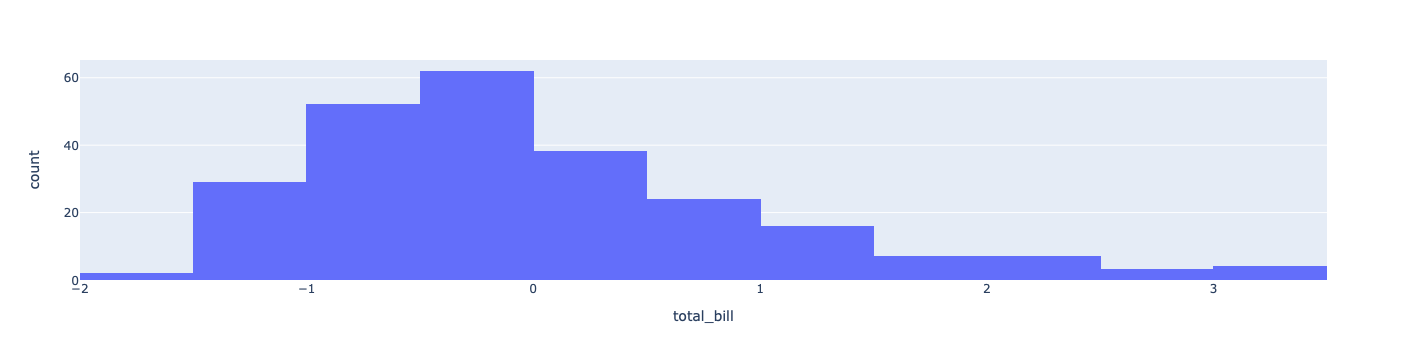

In [33]:
fig = px.histogram(df_SS, x="total_bill")
fig.show()

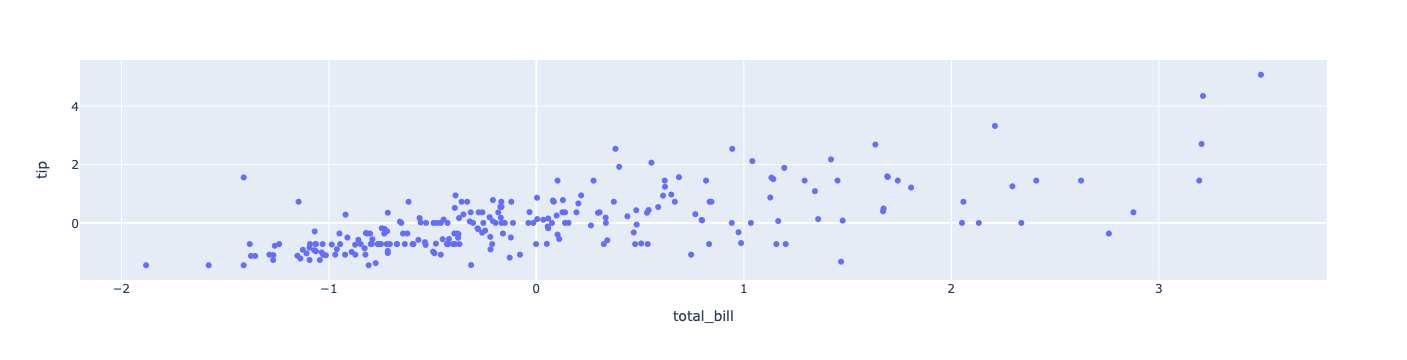

In [31]:
fig = px.scatter(df_SS, x="total_bill", y="tip")
fig.show()

# 2 - Max ABS Scaling

In [15]:
df_max_abs=df_sample.copy()

In [16]:
from sklearn.preprocessing import MaxAbsScaler

In [18]:
cols_to_norm = ['total_bill','tip']
df_max_abs[cols_to_norm] = MaxAbsScaler().fit_transform(df_max_abs[cols_to_norm])
df_max_abs

total_bill    tip  sex  smoker  time
0      0.334383  0.101    0       0     2
1      0.203503  0.166    1       0     2
2      0.413501  0.350    1       0     2
3      0.466050  0.331    1       0     2
4      0.483960  0.361    0       0     2
..          ...    ...  ...     ...   ...
239    0.571344  0.592    1       0     2
240    0.534934  0.200    0       1     2
241    0.446172  0.200    1       1     2
242    0.350718  0.175    1       0     2
243    0.369612  0.300    0       0     2

[244 rows x 5 columns]

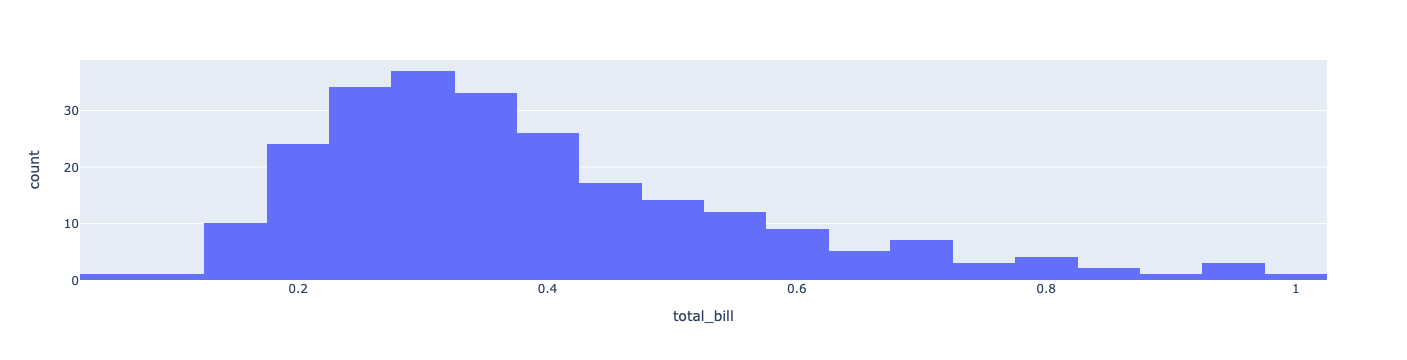

In [19]:
fig = px.histogram(df_max_abs, x="total_bill")
fig.show()

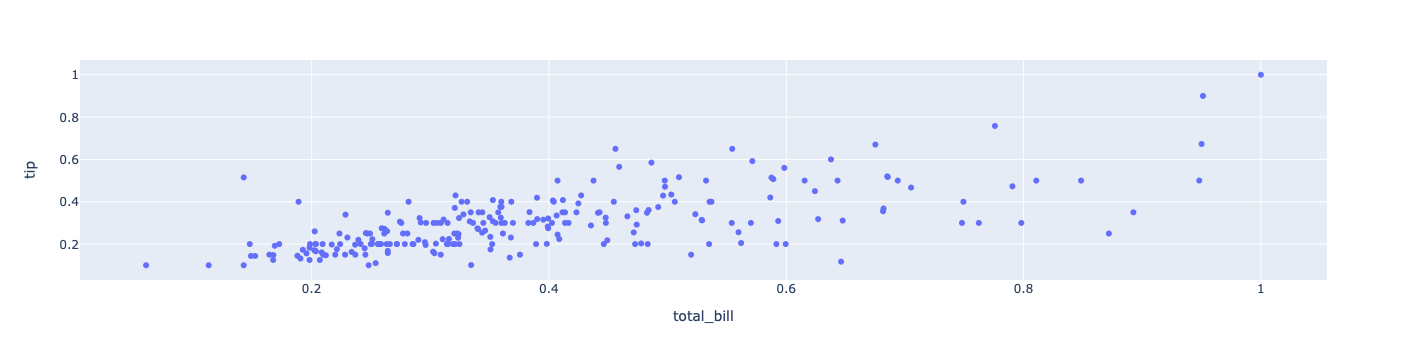

In [34]:
fig = px.scatter(df_max_abs, x="total_bill", y="tip")
fig.show()

# 3 - Min Max Scaling

In [20]:
df_min_max=df_sample.copy()

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
cols_to_norm = ['total_bill','tip']
df_min_max[cols_to_norm] = MinMaxScaler().fit_transform(df_min_max[cols_to_norm])
df_min_max

total_bill       tip  sex  smoker  time
0      0.291579  0.001111    0       0     2
1      0.152283  0.073333    1       0     2
2      0.375786  0.277778    1       0     2
3      0.431713  0.256667    1       0     2
4      0.450775  0.290000    0       0     2
..          ...       ...  ...     ...   ...
239    0.543779  0.546667    1       0     2
240    0.505027  0.111111    0       1     2
241    0.410557  0.111111    1       1     2
242    0.308965  0.083333    1       0     2
243    0.329074  0.222222    0       0     2

[244 rows x 5 columns]

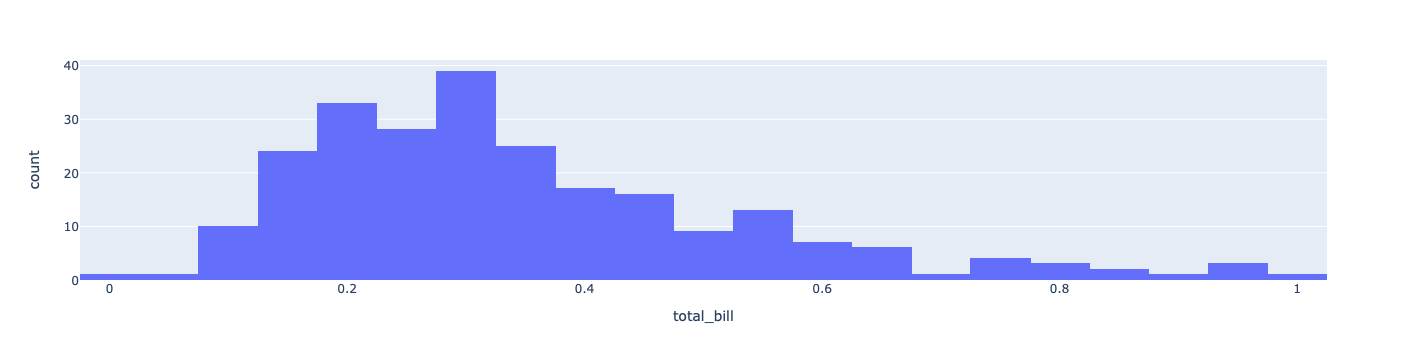

In [23]:
fig = px.histogram(df_min_max, x="total_bill")
fig.show()

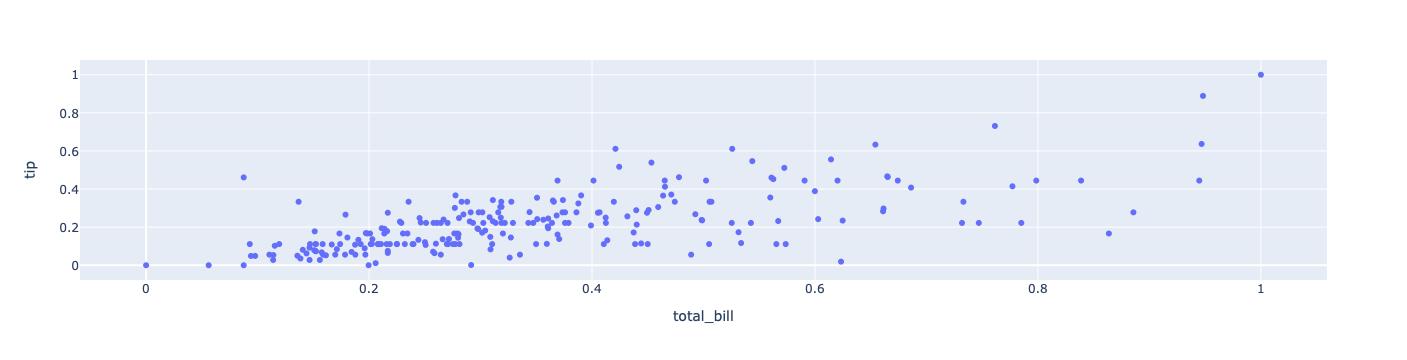

In [35]:
fig = px.scatter(df_min_max, x="total_bill", y="tip")
fig.show()

# 4 - Robust Scaler

In [24]:
df_robust_scaler=df_sample.copy()

In [25]:
from sklearn.preprocessing import RobustScaler
cols_to_norm = ['total_bill','tip']
df_robust_scaler[cols_to_norm] = RobustScaler(with_centering = True, with_scaling = True).fit_transform(df_robust_scaler[cols_to_norm])
df_robust_scaler

total_bill     tip  sex  smoker  time
0     -0.074675 -1.2096    0       0     2
1     -0.691558 -0.7936    1       0     2
2      0.298237  0.3840    1       0     2
3      0.545918  0.2624    1       0     2
4      0.630334  0.4544    0       0     2
..          ...     ...  ...     ...   ...
239    1.042208  1.9328    1       0     2
240    0.870594 -0.5760    0       1     2
241    0.452226 -0.5760    1       1     2
242    0.002319 -0.7360    1       0     2
243    0.091373  0.0640    0       0     2

[244 rows x 5 columns]

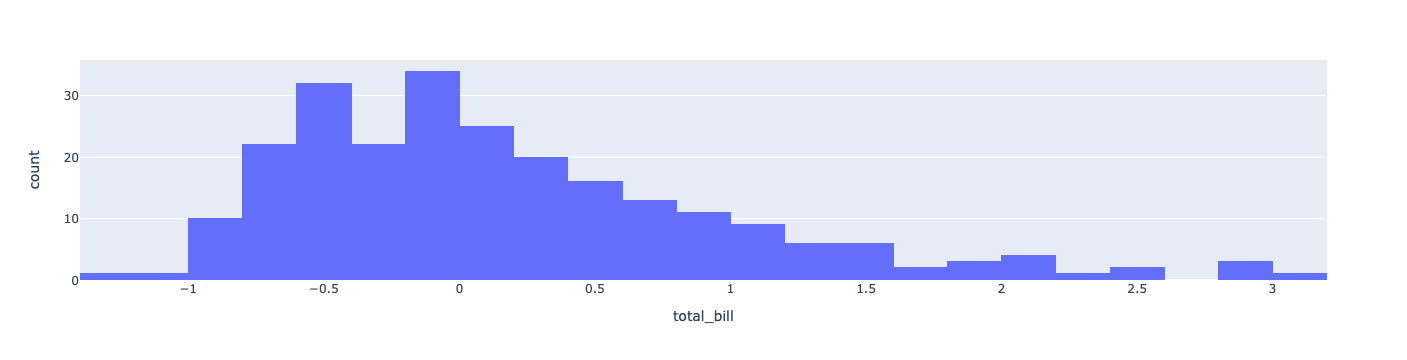

In [26]:
fig = px.histogram(df_robust_scaler, x="total_bill")
fig.show()

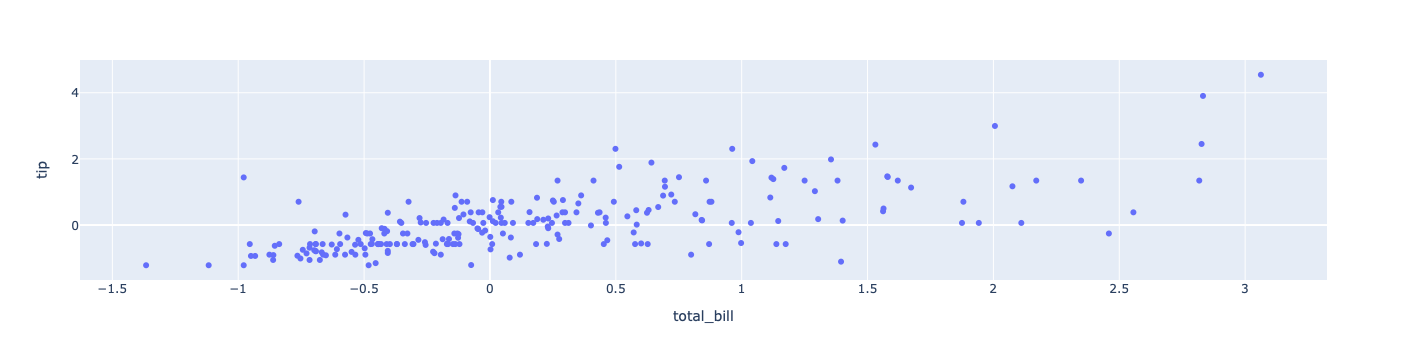

In [36]:
fig = px.scatter(df_robust_scaler, x="total_bill", y="tip")
fig.show()

# K-MEANS CLUSTERING

In [27]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [42]:
df

total_bill   tip  sex  smoker  time
0         16.99  1.01    0       0     2
1         10.34  1.66    1       0     2
2         21.01  3.50    1       0     2
3         23.68  3.31    1       0     2
4         24.59  3.61    0       0     2
..          ...   ...  ...     ...   ...
239       29.03  5.92    1       0     2
240       27.18  2.00    0       1     2
241       22.67  2.00    1       1     2
242       17.82  1.75    1       0     2
243       18.78  3.00    0       0     2

[244 rows x 5 columns]

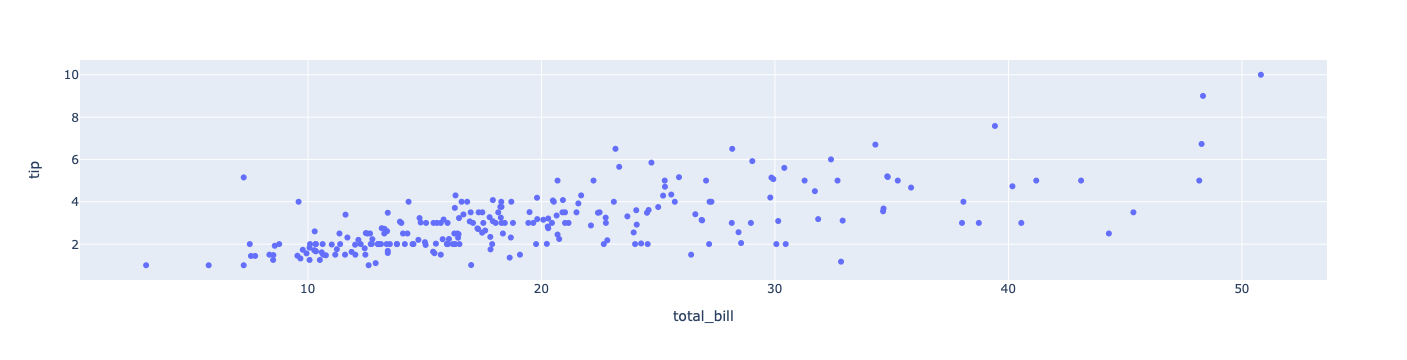

In [28]:
fig = px.scatter(df, x="total_bill", y="tip")
fig.show()

In [69]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       0, 2], dtype=int32)

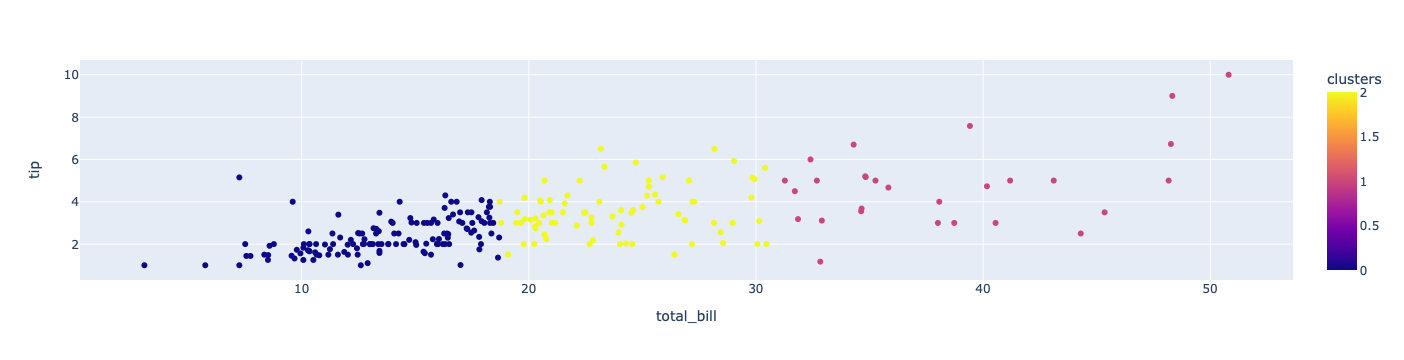

In [70]:
df_with_clusters = df.copy()
df_with_clusters['clusters'] = identified_clusters 
fig=px.scatter(df_with_clusters, x='total_bill',y='tip',color='clusters')
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'WCSS')

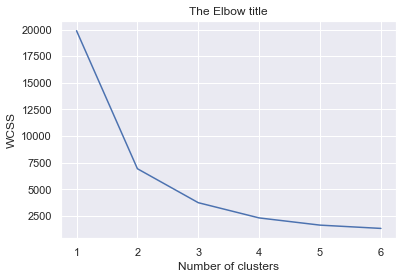

In [62]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# K-Means with Standart Scaler

In [46]:
df_SS

total_bill       tip  sex  smoker  time
0     -0.314711 -1.439947    0       0     2
1     -1.063235 -0.969205    1       0     2
2      0.137780  0.363356    1       0     2
3      0.438315  0.225754    1       0     2
4      0.540745  0.443020    0       0     2
..          ...       ...  ...     ...   ...
239    1.040511  2.115963    1       0     2
240    0.832275 -0.722971    0       1     2
241    0.324630 -0.722971    1       1     2
242   -0.221287 -0.904026    1       0     2
243   -0.113229  0.001247    0       0     2

[244 rows x 5 columns]

In [48]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_SS)
identified_clusters

array([0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 1], dtype=int32)

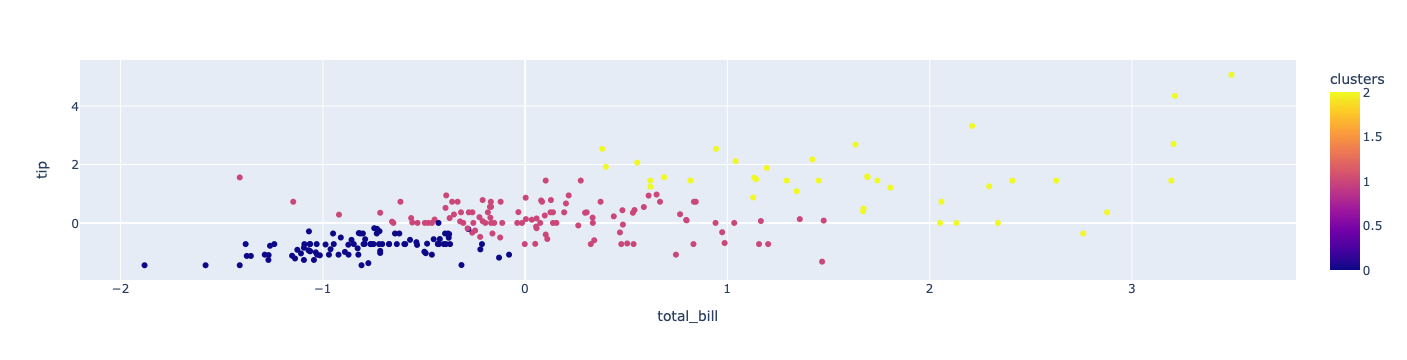

In [49]:
df_SS_with_clusters = df_SS.copy()
df_SS_with_clusters['clusters'] = identified_clusters 
fig=px.scatter(df_SS_with_clusters, x='total_bill',y='tip',color='clusters')
fig.show()

In [64]:
df_SS_with_clusters

total_bill       tip  sex  smoker  time  clusters
0     -0.314711 -1.439947    0       0     2         0
1     -1.063235 -0.969205    1       0     2         0
2      0.137780  0.363356    1       0     2         1
3      0.438315  0.225754    1       0     2         1
4      0.540745  0.443020    0       0     2         1
..          ...       ...  ...     ...   ...       ...
239    1.040511  2.115963    1       0     2         2
240    0.832275 -0.722971    0       1     2         1
241    0.324630 -0.722971    1       1     2         1
242   -0.221287 -0.904026    1       0     2         0
243   -0.113229  0.001247    0       0     2         1

[244 rows x 6 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'WCSS')

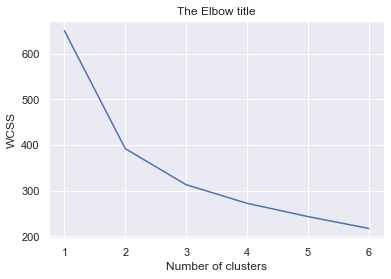

In [63]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df_SS)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# K-Means With Max ABS Scaling

In [50]:
df_max_abs

total_bill    tip  sex  smoker  time
0      0.334383  0.101    0       0     2
1      0.203503  0.166    1       0     2
2      0.413501  0.350    1       0     2
3      0.466050  0.331    1       0     2
4      0.483960  0.361    0       0     2
..          ...    ...  ...     ...   ...
239    0.571344  0.592    1       0     2
240    0.534934  0.200    0       1     2
241    0.446172  0.200    1       1     2
242    0.350718  0.175    1       0     2
243    0.369612  0.300    0       0     2

[244 rows x 5 columns]

In [51]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_max_abs)
identified_clusters

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2,
       1, 0], dtype=int32)

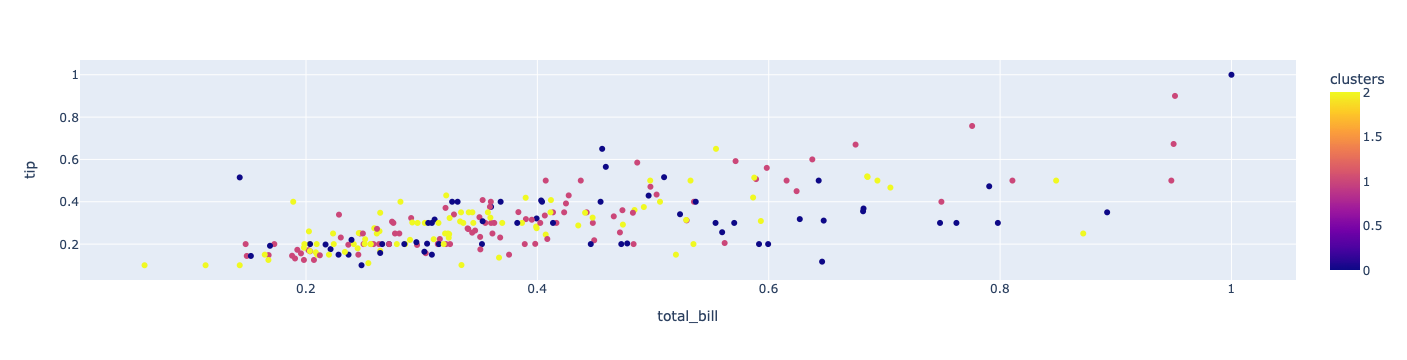

In [55]:
df_max_abs_with_clusters = df_max_abs.copy()
df_max_abs_with_clusters['clusters'] = identified_clusters 
fig=px.scatter(df_max_abs_with_clusters, x='total_bill',y='tip',color='clusters')
fig.show()

# K-Means With Min Max Scaling

In [53]:
df_min_max

total_bill       tip  sex  smoker  time
0      0.291579  0.001111    0       0     2
1      0.152283  0.073333    1       0     2
2      0.375786  0.277778    1       0     2
3      0.431713  0.256667    1       0     2
4      0.450775  0.290000    0       0     2
..          ...       ...  ...     ...   ...
239    0.543779  0.546667    1       0     2
240    0.505027  0.111111    0       1     2
241    0.410557  0.111111    1       1     2
242    0.308965  0.083333    1       0     2
243    0.329074  0.222222    0       0     2

[244 rows x 5 columns]

In [54]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_min_max)
identified_clusters

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0,
       1, 2], dtype=int32)

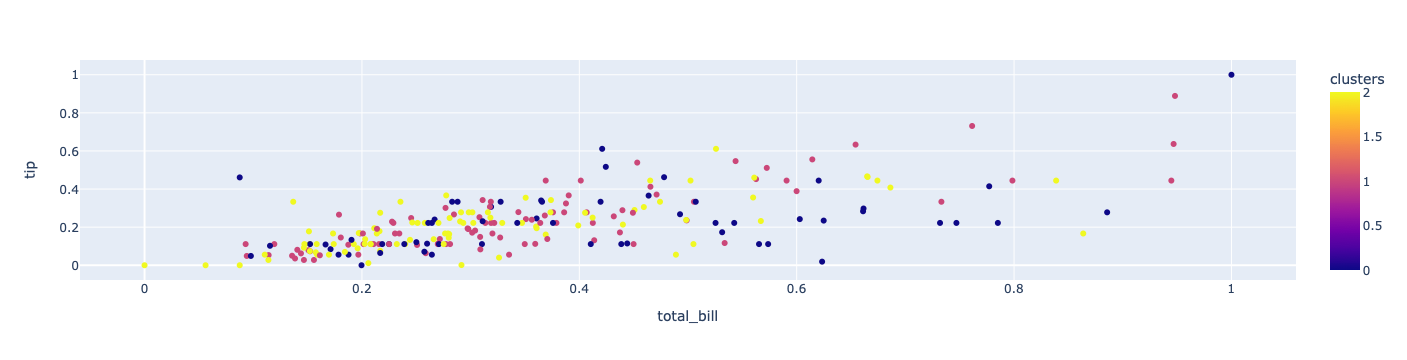

In [56]:
df_min_max_with_clusters = df_min_max.copy()
df_min_max_with_clusters['clusters'] = identified_clusters 
fig=px.scatter(df_min_max_with_clusters, x='total_bill',y='tip',color='clusters')
fig.show()

# K-Means With Robust Scaler

In [57]:
df_robust_scaler

total_bill     tip  sex  smoker  time
0     -0.074675 -1.2096    0       0     2
1     -0.691558 -0.7936    1       0     2
2      0.298237  0.3840    1       0     2
3      0.545918  0.2624    1       0     2
4      0.630334  0.4544    0       0     2
..          ...     ...  ...     ...   ...
239    1.042208  1.9328    1       0     2
240    0.870594 -0.5760    0       1     2
241    0.452226 -0.5760    1       1     2
242    0.002319 -0.7360    1       0     2
243    0.091373  0.0640    0       0     2

[244 rows x 5 columns]

In [58]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_robust_scaler)
identified_clusters

array([0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 2], dtype=int32)

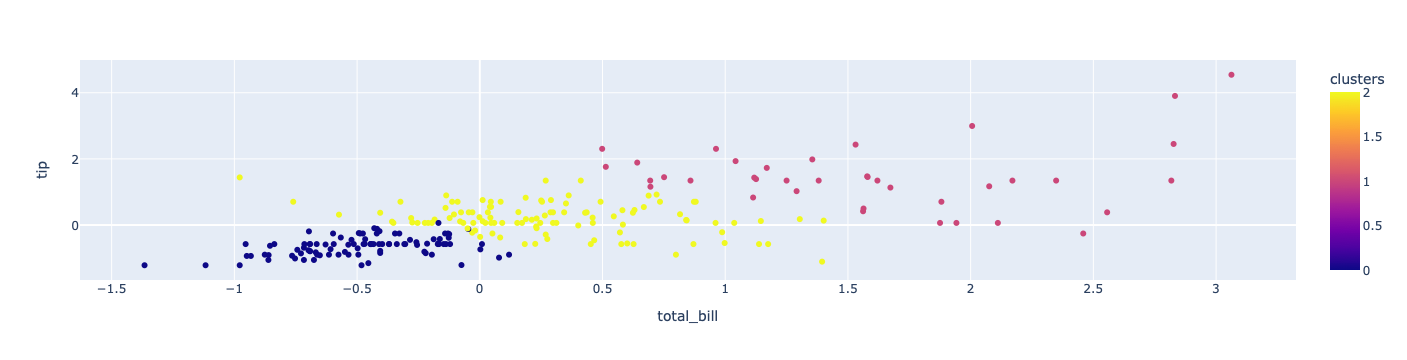

In [59]:
df_robust_scaler_with_clusters = df_robust_scaler.copy()
df_robust_scaler_with_clusters['clusters'] = identified_clusters 
fig=px.scatter(df_robust_scaler_with_clusters, x='total_bill',y='tip',color='clusters')
fig.show()